In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
data=pd.read_csv("../input/newspaperdata/NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [8]:
#Correlation
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

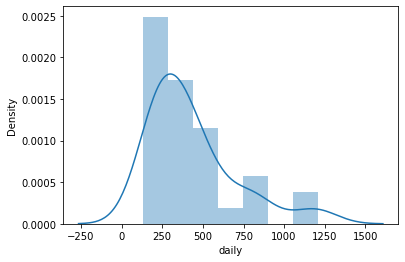

In [9]:
import seaborn as sns
sns.distplot(data['daily'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

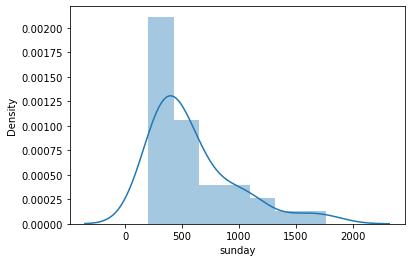

In [10]:
import seaborn as sns
sns.distplot(data['sunday'])

In [14]:
#Fitting Linear Regression Model
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=data).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

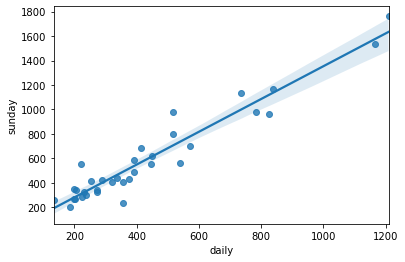

In [15]:
sns.regplot(x="daily",y="sunday",data=data)

In [16]:
#Coefficient
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [17]:
#t and p-values
print(model.tvalues,model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [19]:
#Predict for New Data Point
newdata=pd.Series([200,300])

In [22]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [ ]:
model.predict(data_pred)